In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi
import math

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx

# import basic plot tools
from qiskit.visualization import plot_histogram

In [195]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()
    #print(D)
    zero = 0
    one = 0
    for r in D:
        if(r[1]=='0'):
            zero += D[r]
        else: 
            one += D[r]
    print("Zero" + str(zero/8192))
    print("One" + str(one/8192))

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim,shots=8192)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

In [236]:
#recebe circuito e registo com 3 qubits para por no estado ghz
def ghz(qc,qr,cr):
    qc.h(qr[0])
    qc.t(qr[0])
    qc.h(qr[0])
    qc.s(qr[0])
    #qc.x(qr[0])
    qc.h(qr[1])
    qc.cx(qr[1],qr[2])
    qc.cx(qr[2],qr[3])
    qc.cx(qr[0],qr[1])
    qc.h(qr[0])
    qc.measure(qr[0],cr[0])
    qc.measure(qr[1],cr[1])
    qc.cx(qr[1],qr[2])
    qc.cz(qr[0],qr[2])
    qc.barrier()
    qc.h(qr[3])
    qc.measure(qr[3],cr[3])
    qc.cz(qr[3],qr[2])
    qc.measure(qr[2],cr[2])

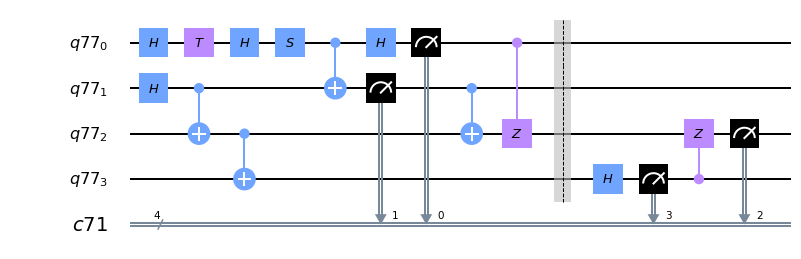

In [237]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)
ghz(qc,qr,cr)
qc.draw(output='mpl')

simulation: 

 {'1011': 807, '1010': 880, '1101': 177, '1000': 819, '0101': 156, '0000': 889, '0011': 877, '1001': 910, '0100': 144, '0110': 161, '1110': 145, '0001': 879, '0111': 151, '0010': 885, '1111': 166, '1100': 146}


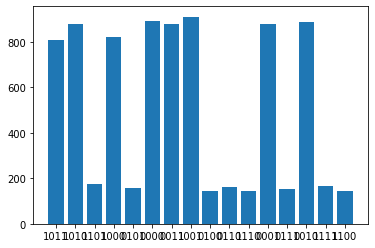

Zero0.847900390625
One0.152099609375


In [238]:
execute_locally(qc)

In [239]:
def ghz2(qc,qr,cr):
    qc.h(qr[0])
    qc.t(qr[0])
    qc.h(qr[0])
    qc.s(qr[0])
    #qc.x(qr[0])
    qc.h(qr[1])
    qc.cx(qr[1],qr[2])
    qc.cx(qr[1],qr[3])
    qc.barrier()
    qc.cx(qr[0],qr[1])
    qc.h(qr[0])
    qc.cx(qr[1],qr[2])
    qc.cz(qr[0],qr[2])
    qc.measure(qr[2],cr[2])
    #qc.barrier()
    #qc.h(qr[3])
    #qc.measure(qr[3],cr[3])
    #qc.cz(qr[3],qr[2])
    #qc.measure(qr[2],cr[2])

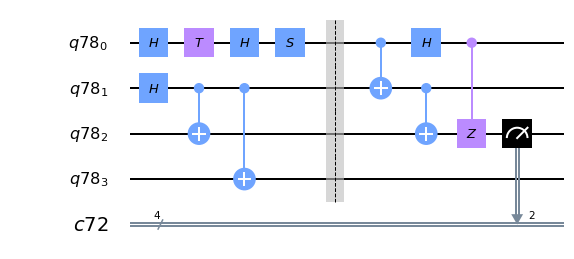

In [240]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)
ghz2(qc,qr,cr)
qc.draw(output='mpl')

simulation: 

 {'0100': 1209, '0000': 6983}


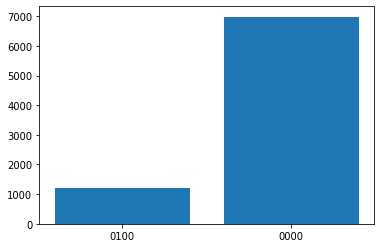

Zero0.8524169921875
One0.1475830078125


In [241]:
execute_locally(qc)

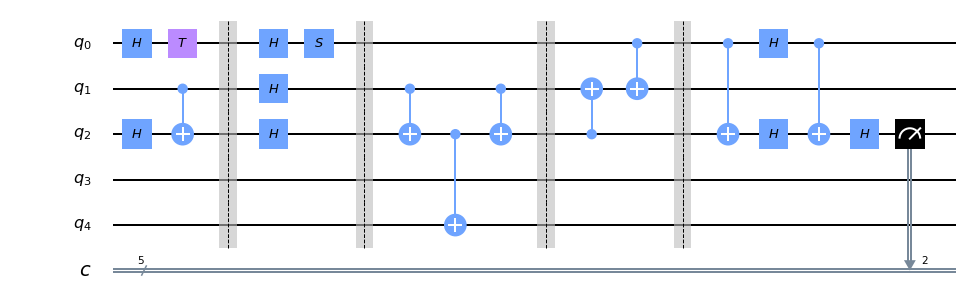

In [242]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister (5, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.t(qr[0])
qc.h(qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()
for i in range (3):
    qc.h(qr[i])
qc.s(qr[0])

qc.barrier()

qc.cx(qr[1],qr[2])
qc.cx(qr[2],qr[4])
qc.cx(qr[1],qr[2])

qc.barrier()
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[1])

qc.barrier()

qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.h(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[2])

qc.measure(qr[2],cr[2])
qc.draw(output='mpl')

simulation: 

 {'00100': 1175, '00000': 7017}


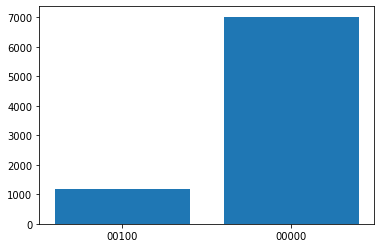

Zero1.0
One0.0


In [243]:
execute_locally(qc)